In [1]:
# https://www.kaggle.com/aherparesh/sentiment-analysis-on-amazon-product-rnn-97-acc
# https://www.kaggle.com/lele1995/amazon-reviews-sentiment-analysis


In [37]:
#! pip install wordcloud
# linear algebra
import numpy as np 
import time, datetime
# data processing
import pandas as pd 
import json
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

import boto3
import io
import time, datetime
from io import StringIO
from io import BytesIO
import json
#text Analysis
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
df1_file_key = 'ml/training_data/Amazon_review_data1(1409_1).csv'
df2_file_key = 'ml/training_data/Amazon_review_data3(Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19).csv'
df3_file_key = 'ml/training_data/Amazon_review_data2(Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products).csv'
bucket = 'swire-datalake-dev-bucket'

s3 = boto3.client('s3')
df1_obj = s3.get_object(Bucket=bucket, Key=df1_file_key)
df2_obj = s3.get_object(Bucket=bucket, Key=df2_file_key)
df3_obj = s3.get_object(Bucket=bucket, Key=df3_file_key)



df = pd.read_csv(io.BytesIO(df1_obj['Body'].read()))
df2 = pd.read_csv(io.BytesIO(df2_obj['Body'].read()))
df3 = pd.read_csv(io.BytesIO(df3_obj['Body'].read()))


C:\Users\vimald\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [5]:
data = df[["id","reviews.text","reviews.rating"]]
data.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [6]:
data.describe(include=["O"])

,id,reviews.text
count,34660,34659
unique,42,34659
top,AVphgVaX1cnluZ0-DR74,I love the Echo. Would recommend this to every...
freq,10966,1


In [7]:
data = data.dropna()

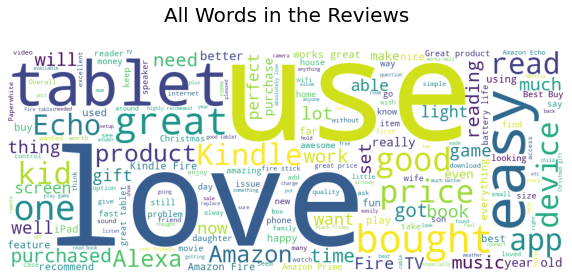

In [8]:
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

In [9]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(data['reviews.text'])

In [10]:
rt = " ".join(data['reviews.text'])
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1

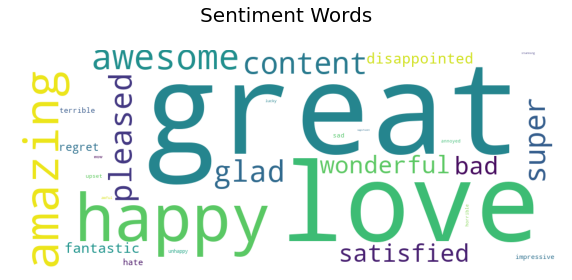

In [11]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

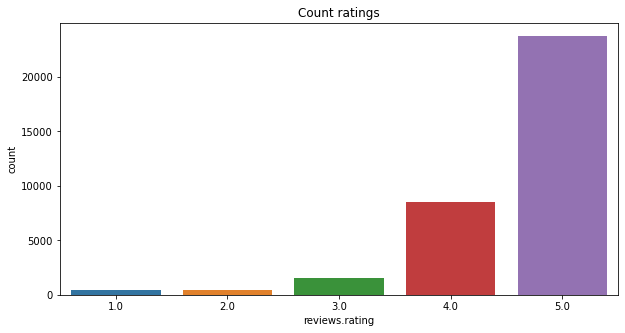

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [13]:
data1 = data.groupby("id").mean().reset_index()

In [14]:
data1 = data1.sort_values(['reviews.rating']).reset_index()

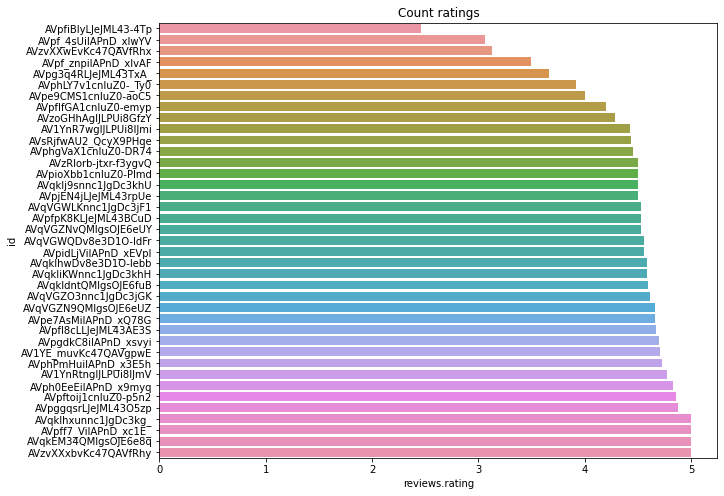

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=data1["reviews.rating"], y=data1["id"])
plt.title('Count ratings')
plt.show()

In [16]:
data2 = df2[["id","reviews.text","reviews.rating"]]
data3 = df3[["id","reviews.text","reviews.rating"]]

In [17]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [18]:
len(data2), len(data3)

(2787, 314)

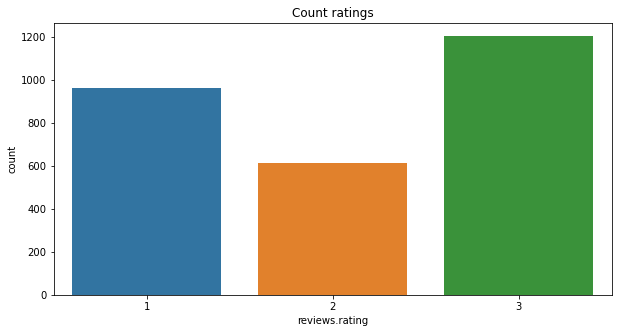

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data2['reviews.rating'])
plt.title('Count ratings')
plt.show()

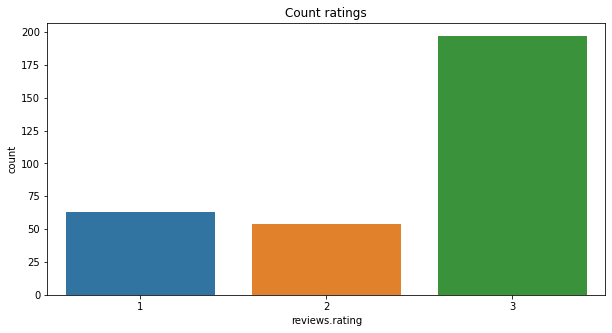

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data3['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [21]:
frames = [data, data2, data3]
final = pd.concat(frames)

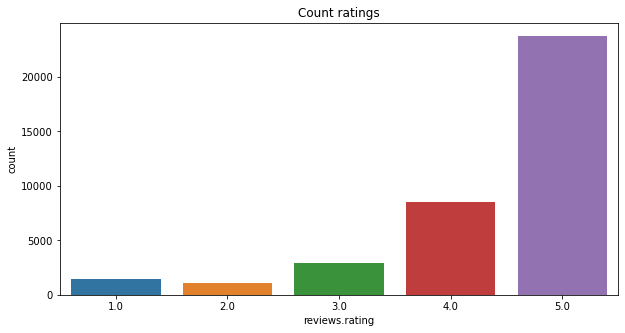

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(final['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [23]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [24]:
final['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

## To store the eda results to S3

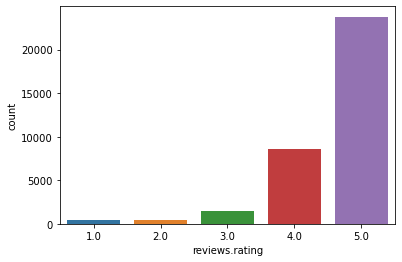

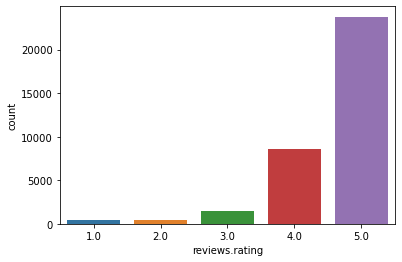

In [27]:
fig, ax = plt.subplots()
sns.countplot(data['reviews.rating'],ax =ax)
fig

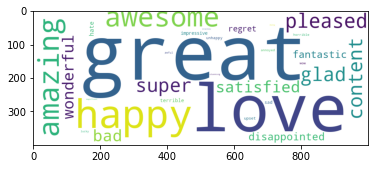

<Figure size 720x360 with 0 Axes>

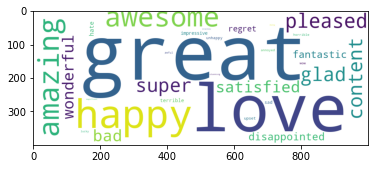

In [28]:

wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
plt.imshow(wordcloud)
fig

In [29]:
bucket_name = "swire-datalake-dev-bucket"
filepath = "ml/metadata/nlp/amazon_sentiment_analysis/eda_results"
image_name = 'Sentiment_positive_word_cloud.png'
filepath_withimage_name = filepath + "/" + image_name

Fig =  fig

In [30]:
#https://stackoverflow.com/questions/31485660/python-uploading-a-plot-from-memory-to-s3-using-matplotlib-and-boto
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvas
import boto3
import io

def write_image_to_s3 (Fig,bucket_name,filepath_withimage_name ):
    s3 = boto3.resource('s3')
    canvas = FigureCanvas(Fig) # renders figure onto canvas
    imdata = io.BytesIO() # prepares in-memory binary stream buffer (think of this as a txt file but purely in memory)
    canvas.print_png(imdata) # writes canvas object as a png file to the buffer. You can also use print_jpg, alternatively

    

    
    
    return s3.Object(bucket_name,filepath_withimage_name ).put(Body=imdata.getvalue(),ContentType='image/png') 



write_image_to_s3 (fig,bucket_name,filepath_withimage_name)

{'ResponseMetadata': {'RequestId': '685A3D5E90E93E14',
  'HostId': 'rrZWzLA2pVMKHZv82dCm7iRVJwlWNVgy26cLNzpHKEHUAnx2yYfYK0fyYdQ6c4zSRqcpzekfd68=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'rrZWzLA2pVMKHZv82dCm7iRVJwlWNVgy26cLNzpHKEHUAnx2yYfYK0fyYdQ6c4zSRqcpzekfd68=',
   'x-amz-request-id': '685A3D5E90E93E14',
   'date': 'Wed, 30 Sep 2020 09:09:49 GMT',
   'x-amz-version-id': 'vRjHZUjFM3Y_fXhzMAmuhzg3x3MXhbPO',
   'etag': '"059d2b3c2b560cc9b39c2cf807935e85"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'ETag': '"059d2b3c2b560cc9b39c2cf807935e85"',
 'VersionId': 'vRjHZUjFM3Y_fXhzMAmuhzg3x3MXhbPO'}

In [31]:
#final.to_csv('after_eda_training_data.csv')

In [32]:

def write_to_s3(bucket_name,result_key, raw_data): # ,aws_access_id,aws_access_key
    csv_buffer = StringIO()
    raw_data.to_csv(csv_buffer)
    resource = boto3.resource('s3') # , aws_access_key_id= aws_access_id ,aws_secret_access_key=aws_access_key
    
    return resource.Object(bucket_name,result_key).put(Body=csv_buffer.getvalue())

In [33]:
write_to_s3(bucket,'ml/training_data/Amazon_after_eda_for_training.csv',final)

{'ResponseMetadata': {'RequestId': '903ECD12072F5181',
  'HostId': '3q4AF1beYaV7+w6luFXIEKFkB8gX6ns4Xt/VQXg25rOoqWYzmDkFm52HugL5RZSq9G0B6d/SjY8=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '3q4AF1beYaV7+w6luFXIEKFkB8gX6ns4Xt/VQXg25rOoqWYzmDkFm52HugL5RZSq9G0B6d/SjY8=',
   'x-amz-request-id': '903ECD12072F5181',
   'date': 'Wed, 30 Sep 2020 09:09:58 GMT',
   'x-amz-version-id': 'D2jPsV0pCjU1p15ud4ap5Tx_thhnXD2l',
   'etag': '"210fea4fd0c708e42fec1f4bb708bd26"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'ETag': '"210fea4fd0c708e42fec1f4bb708bd26"',
 'VersionId': 'D2jPsV0pCjU1p15ud4ap5Tx_thhnXD2l'}

## Training Data metadata -store to s3

In [42]:
time = datetime.datetime.now().strftime("%Y-%m-%d#%H:%M:%S")
time

'2020-09-30#09:14:46'

In [35]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [43]:
trainingfile_metadata={
    "file_name" : "train_df" ,
    "features" : str(list(df.columns)),
     "file_size" : str(df.shape),
     "time_stamp" : time
      }
trainingfile_json_meta = json.dumps(trainingfile_metadata)

trainingfile_json_meta

'{"file_name": "train_df", "features": "[\'id\', \'name\', \'asins\', \'brand\', \'categories\', \'keys\', \'manufacturer\', \'reviews.date\', \'reviews.dateAdded\', \'reviews.dateSeen\', \'reviews.didPurchase\', \'reviews.doRecommend\', \'reviews.id\', \'reviews.numHelpful\', \'reviews.rating\', \'reviews.sourceURLs\', \'reviews.text\', \'reviews.title\', \'reviews.userCity\', \'reviews.userProvince\', \'reviews.username\']", "file_size": "(34660, 21)", "time_stamp": "2020-09-30#09:14:46"}'

In [45]:
bucket ='swire-datalake-dev-bucket'
path = "ml/metadata/nlp/amazon_sentiment_analysis/trainingfile_metadata"
file_name = 'trainingfile_info_'+ time +'.txt'
data = trainingfile_json_meta

key = path + "/" + file_name
#tags = 'Training_version={}&Trained_date={}'.format('V1', Tag_time)

def write_trainingfile_metadata_to_s3 (bucket,key,data): #,tags

    """
    store the training file info i.e shape, column names ,  file names
    
    """
    
    # Versioning 
    s3_resource = boto3.resource('s3')
    versioning = s3_resource.BucketVersioning(bucket)
    versioning.enable()
    # Put object
    s3_client = boto3.client('s3')
    response = s3_client.put_object(
                                    Bucket=bucket,
                                    Body=data,
                                    Key=key
                                    ) # Tagging=tags 
    
    return response

write_trainingfile_metadata_to_s3 (bucket,key,data)

{'ResponseMetadata': {'RequestId': '6B203461A2FE390A',
  'HostId': 'lgKCO2FyY5IGR3WjJ7Pi7pCr4a1dJkDu29g+qCis1WM/BPChCHOxH36IQpDIL47DN2Nlu9YjHbg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'lgKCO2FyY5IGR3WjJ7Pi7pCr4a1dJkDu29g+qCis1WM/BPChCHOxH36IQpDIL47DN2Nlu9YjHbg=',
   'x-amz-request-id': '6B203461A2FE390A',
   'date': 'Wed, 30 Sep 2020 09:15:43 GMT',
   'x-amz-version-id': 'qyGezb4drM.JS2ypWBrZMGSH7QOFso0E',
   'etag': '"5eb57223f23956627cd0860fe385c21a"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'ETag': '"5eb57223f23956627cd0860fe385c21a"',
 'VersionId': 'qyGezb4drM.JS2ypWBrZMGSH7QOFso0E'}

## Done 